In [18]:
import numpy as np
import pylab as pl
%pylab inline

import time
from IPython.display import display, clear_output

Populating the interactive namespace from numpy and matplotlib


In [156]:
np.random.seed(333)

In [157]:
random_1=np.random.randn(2,100)

In [158]:
random_1.shape

(2, 100)

In [159]:
random_2 = np.random.randn(2,100) + 2

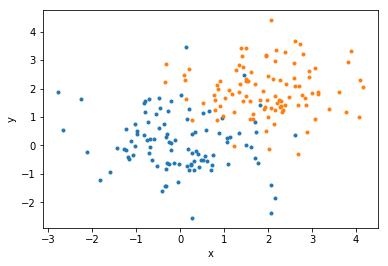

In [160]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.xlabel('x')
pl.ylabel('y');

In [175]:
clusters=2

In [176]:
random_stack = np.hstack([random_1, random_2])

In [177]:
min(random_stack[0]), max(random_stack[0])

(-2.7721666442989643, 4.1499677309187222)

In [178]:
centers = np.array([[0.,-1.], [0,-2]]) 
#np.array((np.random.rand(4)   * (max(random_stack[0]) - min(random_stack[0]))) + min(random_stack[0])).reshape(2,2)

Text(0,0.5,'y')

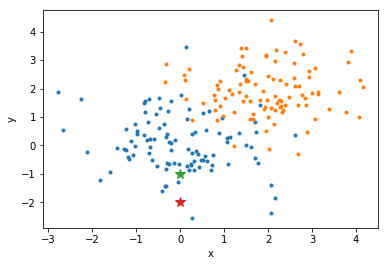

In [179]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.plot(centers[0,0], centers[0,1],'*', markersize=10)
pl.plot(centers[1,0], centers[1,1],'*', markersize=10)
pl.xlabel('x')
pl.ylabel('y')

In [180]:
def distmetric(x, y, center):
    distmetric = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [181]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [182]:
centers, newc

(array([[ 0., -1.],
        [ 0., -2.]]), array([[ 0.96972306,  1.06522176],
        [ 1.02400655, -2.10176012]]))

# 4. calculate new centers

In [183]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

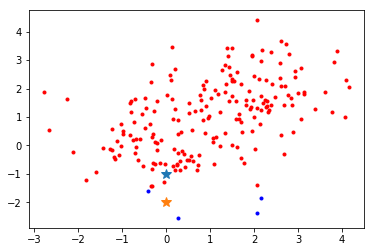

In [184]:
iterat = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:,cl1], random_2[:,cl2]])[0],
             np.hstack([random_1[:,cl1], random_2[:,cl2]])[1], 'r.')

l2, = ax.plot(np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[0],
             np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[1], 'b.')

l3, = ax.plot(centers[0,0], centers[0,1],'*', markersize=10)
l4, = ax.plot(centers[1,0], centers[1,1],'*', markersize=10)

## ** Animated

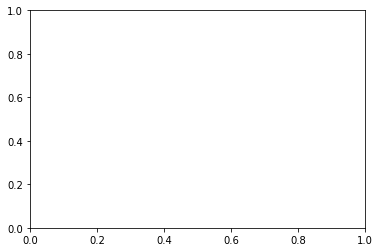

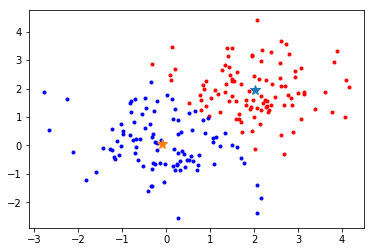

old center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


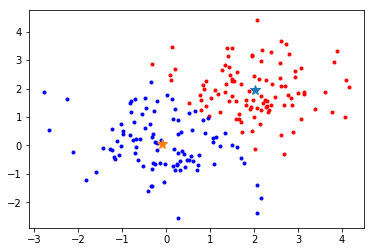

In [185]:
iterat = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:,cl1], random_2[:,cl2]])[0],
             np.hstack([random_1[:,cl1], random_2[:,cl2]])[1], 'r.')

l2, = ax.plot(np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[0],
             np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[1], 'b.')

l3, = ax.plot(centers[0,0], centers[0,1],'*', markersize=10)
l4, = ax.plot(centers[1,0], centers[1,1],'*', markersize=10)

display(fig)

while (not (centers == newc).all()) or iterat > 10:
    print("iteration ",iterat)
    centers = newc
    iterat += 1
    pl.cla()
    time.sleep(1)
    clear_output(wait=True)
    
    display(fig)
    
    l1, = ax.plot(np.hstack([random_1[:,cl1], random_2[:,cl2]])[0],
             np.hstack([random_1[:,cl1], random_2[:,cl2]])[1], 'r.')

    l2, = ax.plot(np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[0],
             np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[1], 'b.')

    l3, = ax.plot(centers[0,0], centers[0,1],'*', markersize=10)
    l4, = ax.plot(centers[1,0], centers[1,1],'*', markersize=10)     
    display(fig)
    #clear_output()
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)
    
    
    
pl.show()

## ** Not Animated - Please run the notebook again to run the results

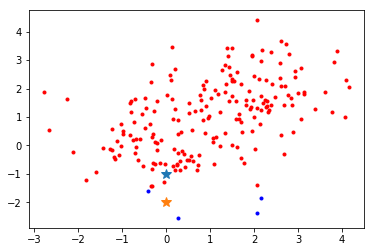

iteration  0


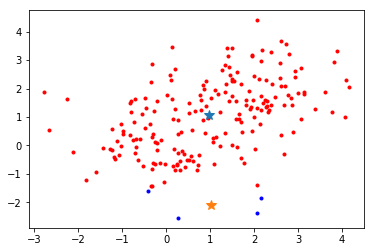

old center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]] 
new center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
iteration  1


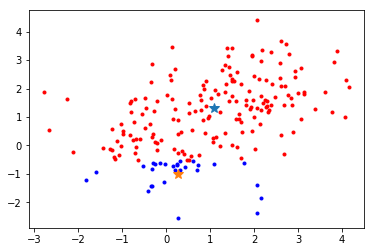

old center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]] 
new center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
iteration  2


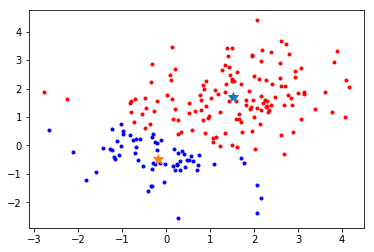

old center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]] 
new center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
iteration  3


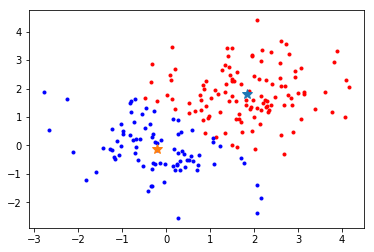

old center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]] 
new center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
iteration  4


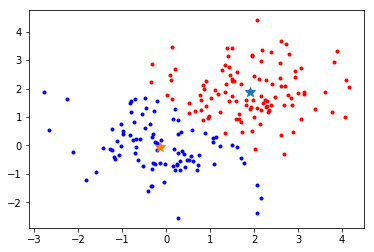

old center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]] 
new center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]]
iteration  5


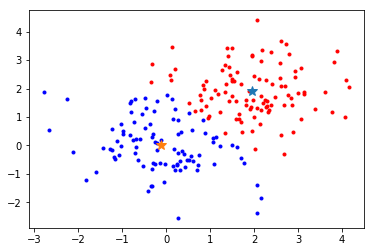

old center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]] 
new center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]]
iteration  6


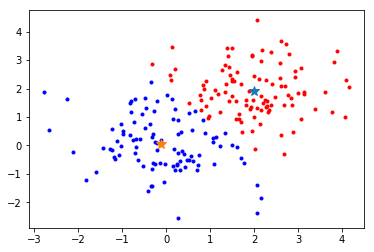

old center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
iteration  7


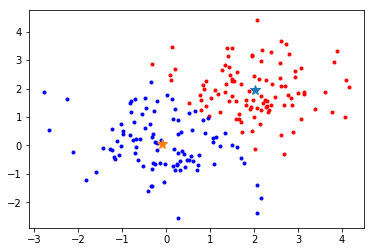

old center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


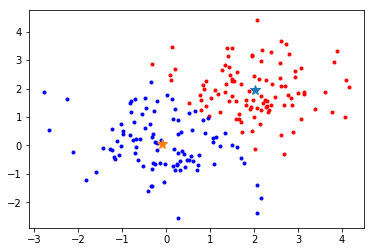

In [122]:
iterat = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:,cl1], random_2[:,cl2]])[0],
             np.hstack([random_1[:,cl1], random_2[:,cl2]])[1], 'r.')

l2, = ax.plot(np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[0],
             np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[1], 'b.')

l3, = ax.plot(centers[0,0], centers[0,1],'*', markersize=10)
l4, = ax.plot(centers[1,0], centers[1,1],'*', markersize=10)

display(fig)

while (not (centers == newc).all()) or iterat > 10:
    print("iteration ",iterat)
    centers = newc
    iterat += 1
    pl.cla()
    
    l1, = ax.plot(np.hstack([random_1[:,cl1], random_2[:,cl2]])[0],
             np.hstack([random_1[:,cl1], random_2[:,cl2]])[1], 'r.')

    l2, = ax.plot(np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[0],
             np.hstack([random_1[:,~cl1], random_2[:,~cl2]])[1], 'b.')

    l3, = ax.plot(centers[0,0], centers[0,1],'*', markersize=10)
    l4, = ax.plot(centers[1,0], centers[1,1],'*', markersize=10)     
    display(fig)
    #clear_output()
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)
    
    
    
pl.show()